## 다항 회귀

농어의 길이와 무게에 대한 산점도를 좀더 반영하면 직선이 아닌 곡선이며, 이는 2차 방정식 그래프이다. 

2차방정식 그래프를 그리기 위해서는 길이를 제곱한 항이 훈련세트에 추가되어야 함을 의미한다. 

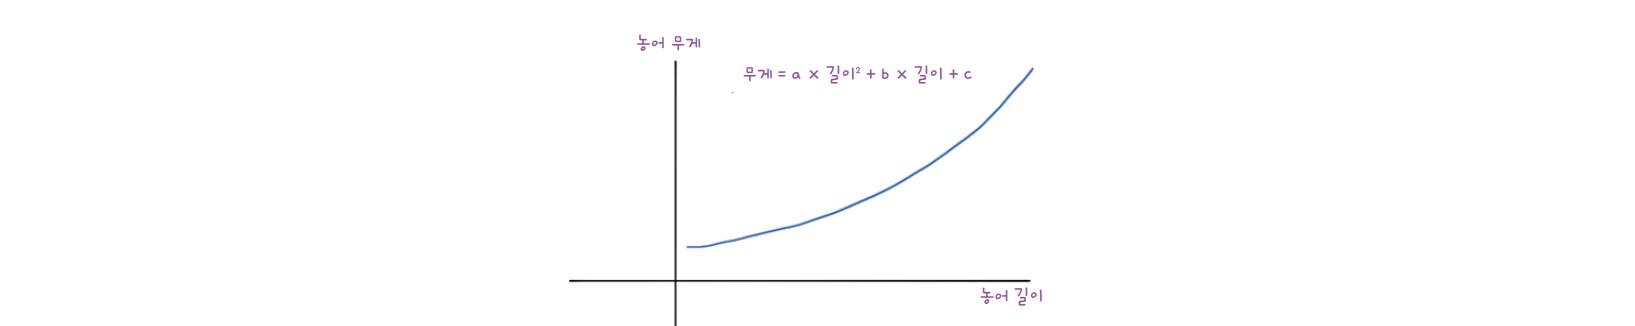

## 데이타 전처리

* PolynomialFeature()로 피처들을 다항으로 변환


* 1차 단항 피처들의 값 $[X_1,X_2] = [2,3]$일 경우
* 2차 다항 피처들의 값은 $[1,X_1,X_2,X_1^2,X_1X_2,X_2^2] = [1,2,3,4,6,9]$로 변환
* 3차 다항 피처들의 값은 $[1,X_1,X_2,X_1^2,X_1X_2,X_2^2,X_1^3,X_1^2X_2,X_1X_2^2,X_2^3] = [1,2,3,4,6,9,8,12,18,27]$로 변환

In [1]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

def evaluate_reg_all(y_test, y_predict):
    MSE = mean_squared_error(y_test,y_predict,squared=True)
    RMSE = mean_squared_error(y_test,y_predict,squared=False)
    MAE = mean_absolute_error(y_test,y_predict)
    R2 = r2_score(y_test,y_predict)
    
    print(f'MSE: {MSE:.3f}, RMSE: {RMSE:.3F}, MAE: {MAE:.3F}, R^2: {R2:.3F}')

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

fish_df = pd.read_csv('./data/fish.csv')

y_target = fish_df['무게']
X_data = fish_df.drop(['무게'],axis=1,inplace=False)

x_train , x_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=777)


# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(x_train)
poly_train = poly.transform(x_train)
poly_test = poly.transform(x_test)

print('변환된 2차 다항식 계수 feature:\n', poly_train)

# 두 개로 나온 것은 왼쪽을 제곱한 것. -> 마치 피쳐가 두 개인 것처럼

변환된 2차 다항식 계수 feature:
 [[  19.6   384.16]
 [   8.4    70.56]
 [  22.    484.  ]
 [  24.6   605.16]
 [  42.   1764.  ]
 [  15.    225.  ]
 [  18.7   349.69]
 [  17.4   302.76]
 [  37.   1369.  ]
 [  27.3   745.29]
 [  25.6   655.36]
 [  32.8  1075.84]
 [  21.    441.  ]
 [  28.    784.  ]
 [  39.   1521.  ]
 [  27.5   756.25]
 [  43.   1849.  ]
 [  40.   1600.  ]
 [  18.    324.  ]
 [  22.5   506.25]
 [  37.   1369.  ]
 [  13.7   187.69]
 [  25.    625.  ]
 [  27.5   756.25]
 [  22.3   497.29]
 [  21.3   453.69]
 [  22.    484.  ]
 [  40.   1600.  ]
 [  24.    576.  ]
 [  39.   1521.  ]
 [  24.    576.  ]
 [  44.   1936.  ]
 [  26.5   702.25]
 [  19.    361.  ]
 [  40.   1600.  ]
 [  23.5   552.25]
 [  34.5  1190.25]
 [  40.   1600.  ]
 [  35.   1225.  ]]


In [3]:
x_train

,길이
8,19.6
0,8.4
15,22.0
26,24.6
51,42.0
2,15.0
6,18.7
4,17.4
42,37.0
30,27.3


In [4]:
#특성이 어떻게 만들어 졌는지 이름 출력
poly.get_feature_names_out()

array(['길이', '길이^2'], dtype=object)

In [5]:
lr = LinearRegression()
lr.fit(poly_train, y_train) #학습

y_preds = lr.predict(poly_test) #예측
evaluate_reg_all(y_test, y_preds)   # 실제값, 예측값

#50cm 농어도 훈련때와 같은 형태로 변환해야 함
print(lr.predict([[50, 50**2]]))

MSE: 3850.020, RMSE: 62.049, MAE: 38.157, R^2: 0.961
[1615.26464705]


In [5]:
print(lr.coef_, lr.intercept_)

[-23.98833071   1.06843911] 143.5834086760651


---
**[농어 무게 예측 방정식]**

$ y = 1.06 * x^2 -23.99 *  x + 143.58$

---

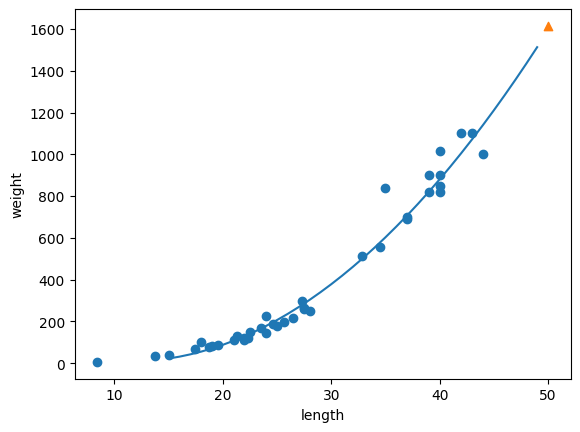

In [8]:
import matplotlib.pyplot as plt
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(x_train, y_train)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.06*point**2 - 23.99*point + 143.58)

# 50cm 농어 데이터
plt.scatter([50], [1615], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

>  
> * 훈련세트의 경향을 잘 따르고 있고 무게가 음수로 나오는 일도 없다. 

In [17]:
# from sklearn.metrics import mean_squared_error , r2_score

# #MSE : 에러들의 평균
# mse = mean_squared_error(y_test, y_preds)

# #R^2 : 실제와 예측의 분산비교
# r2 = r2_score(y_test, y_preds)

# print('MSE : {0:.3f}'.format(mse))
# print('R^2 : {0:.3f}'.format(r2))


# 훈련_R2: 0.9370169868327092
# 테스트_R2: 0.8320172451017458

In [9]:
print(lr.score(poly_train, y_train))
print(lr.score(poly_test, y_test))
# 단순회귀분석 보다 피쳐가 많아서? 점수가 더 올라감.

0.9740693759612158
0.9608860584752101


> * 훈련 세트와 테스트 세트에 대한 점수가 크게 높아졌다. 
> * 조금 더 복잡한 모델이 필요할 것 같다. 
>
> * '길이'라는 한 개의 특성(feature)로는 무게를 예측하는 데 한계가 있을 것이다. 
> * 무게와 연관이 있는 다른 특성들을 조사하여 데이터를 수집한 후 무게 예측 모델을 만들어 봐야 할 것 같다. 